In [1]:
import math as m
import numpy as np
from typing import List, Tuple, Dict
import matplotlib.pyplot as plt
import time
from copy import deepcopy

In [2]:
class Dragonfly:
    def __init__(
        self, 
        x: List[float], 
        f: float
             ):
        self.x = x
        self.f = f
        
class DragonflySwarm:
    def __init__(
        self,
        swarm_size: int,
        dim: int,
        max_iter: int,
        sep: float,
        alignmnt: float,
        cohesn: float,
        tendnsy: float,
        evatn: float,
        weight: float, 
        alpha: float,
        lmbd: float,
        radius: float,
        #area: List[List[float]],
        func_num: int,
        step_modification: int,
        const_for_modif: float
                 ):
        self.swarm_size = swarm_size
        self.dim = dim
        self.max_iter = max_iter
        self.current_iter = 0
        self.sep = sep
        self.alignmt = alignmnt
        self.cohesn = cohesn
        self.tendnsy = tendnsy
        self.evatn = evatn
        self.weight = weight
        self.alpha = alpha
        self.lmbd = lmbd
        self.radius = radius
        self.func_num = func_num
        self.population = []
        self.sep_list = []
        self.alig_list = []
        self.coh_list = []
        self.food_attract = []
        self.enemy_avoid = []
        self.velocity_list =[]
        self.euclid_list = []
        self.best_list = []
        self.worst_list = []
        self.exact = 0
        self.function_name = '-'
        self.func_num = func_num
        self.const_for_modif = 0.5#const_for_modif
        self.step_modification = step_modification
    
    
    def init_area(self):
        if self.func_num == 0:
            self.area = [[-5, 5], [-5, 5]]
            self.exact = 0
            self.function_name = 'Квадратичная'
        elif self.func_num == 1:
            self.area = [[-500, 500], [-500, 500]]
            self.exact = 837.9658
            self.function_name = 'Швефеля'
        elif self.func_num == 2:
            self.area = [[-2, 2], [-2, 2]]
            self.exact = 4.253888
            self.function_name = 'Мульти'
        elif self.func_num == 3:
            self.area = [[-2, 2], [-2, 2]]
            self.exact = 1
            self.function_name = 'Корневая'
        elif self.func_num == 4:
            self.area = [[-10, 10], [-10, 10]]
            self.exact = 1
            self.function_name = 'Шафер'
        elif self.func_num == 5:
            self.area = [[-5, 5], [-5, 5]]
            self.exact = 20
            self.function_name = 'Растригина'
        elif self.func_num == 6:
            self.area = [[-10, 10], [-10, 10]]
            self.exact = 20
            self.function_name = 'Экли'
        elif self.func_num == 7:
            self.area = [[-5, 5], [-5, 5]]
            self.exact = 14.060606
            self.function_name = 'Skin'
        elif self.func_num == 8:
            self.area = [[-5, 5], [-5, 5]]
            self.exact = 1
            self.function_name = 'Trapfall'
        elif self.func_num == 9:
            self.area = [[-3, 3], [-1, 5]]
            self.exact = 0
            self.function_name = 'Розенброка'
        
        

    def form_first_pop(self):
        print('Функция: ', algorithm.function_name)
        self.population.clear()
        for i in range(self.swarm_size):
            coordinate = np.array([np.random.rand() * (self.area[j][1] - self.area[j][0]) + self.area[j][0] 
                          for j in range(self.dim)])
            result = self.Func(coordinate)
            member = Dragonfly(coordinate, result)
            self.population.append(member)

    def generate_step_coord(self):
        self.velocity_list.clear()
        for i in range(self.swarm_size):
#             rj = np.random.uniform(-1, 1)
            velocty = [(self.area[j][1] - self.area[j][0]) * np.random.uniform(-1, 1) / 100
                for j in range(self.dim)]
            self.velocity_list.append(velocty)
            
    # уже не WROOOONG
    def move_swarm(self):
        self.current_iter += 1
        right_area = False # same as "flag" in a previous C# code
        
        radius_area = self.radius * self.current_iter / self.max_iter
        trunk_ = self.max_iter - self.max_iter // 2
        
        population_copy = deepcopy(self.population)
            
        velocity_copy = deepcopy(self.velocity_list)
        
        #population_copy = self.population.copy() 
        
#         print("_________________________")
#         for iii in range(len(population_copy)):
#             print(population_copy[iii].x, population_copy[iii].f)
#         print("_________________________")
        for i in range(self.swarm_size):
            for j in range(self.swarm_size):
                if i != j:
                    dist = np.linalg.norm(np.array(population_copy[i].x) -
                                          np.array(population_copy[j].x))
                    if dist <= radius_area:
                        self.euclid_list.append([j, dist])
            
            if len(self.euclid_list) > 1:
#                 print("=================")
#                 for iii in range(len(self.population)):
#                     print(self.population[iii].x, self.population[iii].f)
#                 print("==================")
                #print('FORMULA')
#                 print("iteration: ", i)
                self.sep_list = self.separation(i, population_copy)
                self.alig_list = self.alignment(i, velocity_copy)
                self.coh_list = self.cohesion(i, population_copy)
                self.food_attract = self.tendensy(i, population_copy)
                self.enemy_avoid = self.evation(i, population_copy)
                
                self.velocity_list.append(self.velocity(i))
                
                #maybe here
                if (self.current_iter < trunk_):
                    tmp_list = self.find_new_position(i)
                else:
                    tmp_list = self.find_new_position_mod(i, self.step_modification)
                
                #add new function redused step
                
                
                for ii in range(self.dim):
                    self.population[i].x[ii] = tmp_list[ii]
                
                self.check_area(i)
                
            else:
                half_set = int(self.dim / 2)
                r_parameter = []
                theta = []
                l_parameter = []
                xi_parameter = []
                
                
                for ii in range(self.dim):
                    iterator_0 = 0
                    while not right_area:
                        r_parameter.append(np.random.rand() * (self.area[ii][1] - self.area[ii][0]) + self.area[ii][0])
#                         print(r_parameter[len(r_parameter)-1])
                        
                        theta.append(r_parameter[len(r_parameter) - 1] * 2 * np.pi)
                        l_parameter.append(r_parameter[len(r_parameter) - 1] ** self.lmbd)

                        if ii < half_set:
                            xi_parameter.append(l_parameter[len(l_parameter) - 1] * np.sin(theta[len(theta) - 1]))
                        else:
                            xi_parameter.append(l_parameter[len(l_parameter) - 1] * np.cos(theta[len(theta) - 1]))
                        

                        check_obl = np.array(self.population[i].x[ii]) + \
                        (self.alpha / (self.current_iter + 1)) * xi_parameter[len(xi_parameter) - 1]
                        #print(check_obl)
                        if (check_obl < self.area[ii][0]) or (check_obl > self.area[ii][1]):
                            right_area = False
                        else:
                            right_area = True
                        iterator_0 += 1
                    #print(iterator_0)
                    right_area = False
                    self.population[i].x[ii] = (self.population[i].x[ii]) + \
                        (self.alpha / (self.current_iter + 1)) * xi_parameter[len(xi_parameter) - 1]
                
            self.population[i].f = self.Func(self.population[i].x)
            #self.population[i].f = self.Schwefel(self.population[i].x)
            self.euclid_list.clear()
        
            
            
            
    def separation(self, it, population_copy):
#         print("--------------------")
        tmp = np.zeros(self.dim)
        for indx, dist in self.euclid_list:
            tmp += (np.array(population_copy[it].x) - np.array(population_copy[indx].x))
            #print(tmp)
        for i in range(self.dim):
            area_tmp = self.area[i][1] - self.area[i][0]
            while (np.abs(tmp[i]) >= area_tmp):
                #print(tmp[i])
                tmp[i] /= 10
            #print(tmp[i],area_tmp/2 , "while finished")
            if(tmp[i] >= (area_tmp/2)):
                #print(tmp[i])
                tmp[i] = tmp[i] / 2
            #print(tmp)
            tmp[i] = -tmp[i]
#         print("sep:", tmp)
        return tmp#.tolist()
    
    def alignment(self, it, velocity_copy):
#         print("--------------------")
        tmp = np.zeros(self.dim)
        #print(self.velocity_list)
        for indx, dist in self.euclid_list:
            tmp += np.array(velocity_copy[indx])
#             print(tmp)
        tmp = tmp / len(self.euclid_list)
        for i in range(self.dim):
            area_tmp = self.area[i][1] - self.area[i][0]
            while (np.abs(tmp[i]) >= area_tmp):
#                 print("tmp[i]:", tmp[i])
                tmp[i] = tmp[i] / 10
            if(tmp[i] >= (area_tmp/2)):
                #print(tmp[i])
                tmp[i] = tmp[i] / 2
#         print("algn:", tmp)
        return tmp#.tolist()
    
    def cohesion(self, it, population_copy):
#         print("--------------------")
        tmp = np.zeros(self.dim)
        for indx, dist in self.euclid_list:
            tmp += np.array(population_copy[indx].x)
        tmp = tmp / len(self.euclid_list) - np.array(population_copy[it].x)
        for i in range(self.dim):
            area_tmp = self.area[i][1] - self.area[i][0]
            while (np.abs(tmp[i]) >= area_tmp):
#                 print("tmp[i]:", tmp[i])
                tmp[i] = tmp[i] / 10
            if(tmp[i] >= (area_tmp/2)):
                #print(tmp[i])
                tmp[i] = tmp[i] / 2
#         print("coh:", tmp)
        return tmp#.tolist()
    
    def tendensy(self, it, population_copy):
        tmp = np.zeros(self.dim)
#         print("--------------------")
        best_p = max(self.population, key=lambda member: member.f)
        tmp = np.array(best_p.x) - np.array(population_copy[it].x)
        for i in range(self.dim):
            area_tmp = self.area[i][1] - self.area[i][0]
            while (np.abs(tmp[i]) >= area_tmp):
#                 print("tmp[i]:", tmp[i])
                tmp[i] = tmp[i] / 10
            if(tmp[i] >= (area_tmp/2)):
                tmp[i] = tmp[i] / 2
#         print("tend:", tmp)
        return tmp#.tolist()
    
    def evation(self, it, population_copy):
        tmp = np.zeros(self.dim)
#         print("--------------------")
        worst_p = min(population_copy, key=lambda member: member.f)
        tmp = np.array(worst_p.x) + np.array(population_copy[it].x)
        for i in range(self.dim):
            area_tmp = self.area[i][1] - self.area[i][0]
            while (np.abs(tmp[i]) >= area_tmp):
#                 print("tmp[i]:", tmp[i])
                tmp[i] = tmp[i] / 10
            if(tmp[i] >= (area_tmp/2)):
                tmp[i] = tmp[i] / 2
#         print("evat:", tmp)
        return tmp#.tolist()
    
    def velocity(self, it):
        
        self.velocity_list[it] = (self.sep * np.array(self.sep_list) + self.alignmt * np.array(self.alig_list) + self.cohesn * np.array(self.coh_list) +\
        self.tendnsy * np.array(self.food_attract) + self.evatn * np.array(self.enemy_avoid) + self.weight * np.array(self.velocity_list[it]))#.tolist()
    
    def find_new_position(self, it):
        tmp = np.zeros(self.dim)
        tmp = np.array(self.population[it].x) + np.array(self.velocity_list[it])
        return tmp
        #self.population[it].f = self.Schwefel(self.population[it].x)
    
    def find_new_position_mod(self, it, modif):
        tmp = np.zeros(self.dim)
        if modif == 0:
            tmp = np.array(self.population[it].x) + np.array(self.velocity_list[it]) / it
        elif modif == 1:
            tmp = np.array(self.population[it].x) + np.array(self.velocity_list[it]) / m.log(it+2)
        elif modif == 2:
            tmp = np.array(self.population[it].x) + np.array(self.velocity_list[it]) * m.log(0.8) / m.log(it+2)
        elif modif == 3:
            tmp = np.array(self.population[it].x) + np.array(self.velocity_list[it]) * m.exp((self.const_for_modif - 1) * it)
        elif modif == 4:
            tmp = np.array(self.population[it].x) + np.array(self.velocity_list[it])
        return tmp
            
    def check_area(self, i):
        if (self.population[i].x[0] < self.area[0][0]):
            self.population[i].x[0] = self.area[0][0]
        elif (self.population[i].x[0] > self.area[0][1]):
            self.population[i].x[0] = self.area[0][1]
        
        if (self.population[i].x[1] < self.area[1][0]):
            self.population[i].x[1] = self.area[1][0]
        elif (self.population[i].x[1] > self.area[1][1]):
            self.population[i].x[1] = self.area[1][1]
    
    def find_best(self):
        return max(self.population, key=lambda dragonfly: dragonfly.f)
    
    def find_worst(self):
        return min(self.population, key=lambda dragonfly: dragonfly.f)
    
    def Work(self):
        start = time.monotonic()
        time.sleep(0.1)
        self.init_area()
        self.form_first_pop()
        self.generate_step_coord()
        
        best = self.find_best()
        tmp = np.zeros(self.dim)
        for i in range(self.dim):
             tmp[i] = best.x[i]
        member_temp = Dragonfly(tmp, best.f)
        self.best_list.append(member_temp)
    
        worst = self.find_worst()
        tmp = np.zeros(self.dim)
        for i in range(self.dim):
             tmp[i] = best.x[i]
        member_temp = Dragonfly(tmp, worst.f)
        self.worst_list.append(member_temp)
        
        for i in range(self.max_iter):
            
            self.move_swarm()
            
            best_temp = self.find_best()
#             print("best temp in Work: ",i,"---", best_temp.x, best_temp.f)
            
            tmp = np.zeros(self.dim)
            
            for j in range(self.dim):
                tmp[j] = best_temp.x[j]
            #tmp = best_temp.x.copy()
            member_temp = Dragonfly(tmp, best_temp.f)
            
            self.best_list.append(member_temp)
            
            worst_temp = self.find_worst()
            tmp = np.zeros(self.dim)
            
            for j in range(self.dim):
                tmp[j] = worst_temp.x[j]
                
            member_temp = Dragonfly(tmp, worst_temp.f)
            self.worst_list.append(member_temp)
            
#             for ii in range(len(self.best_list)):
#                 print("best:", self.best_list[ii].x[0],self.best_list[ii].x[1], self.best_list[ii].f )
        self.best_list.sort(reverse=True, key=lambda dragonfly: dragonfly.f)
        end = time.monotonic()
        self. draw_plots()
        print('work time : {:>9.2f}'.format(end-start))
        #self.worst_list.sort(key=lambda dragonfly: dragonfly.f)
        #print(self.best_list[0], self.worst_list[0])
                     
    def draw_plots(self):
        plt.figure(figsize=(12, 10))
        
        x1 = [self.best_list[i].x[0] for i in range(1, len(self.best_list))]
        x2 = [self.best_list[i].x[1] for i in range(1, len(self.best_list))]
        plt.plot(x1, x2, 'b.')
        x_1 = self.best_list[0].x[0]
        x_2 = self.best_list[0].x[1]
        plt.plot(x_1, x_2, color = 'red', marker = '*')
        plt.ylabel('x2')
        plt.xlabel('x1')


        plt.show()
    def Func(self, coordinate: List[float]):
            if self.func_num == 0:
                self.area = [[-5, 5], [-5, 5]]
                return -(np.array(coordinate)**2).sum()
            elif self.func_num == 1:
                self.area = [[-500, 500], [-500, 500]]
                return coordinate[0] * m.sin(m.sqrt(abs(coordinate[0]))) + coordinate[1] * m.sin(m.sqrt(abs(coordinate[1])))
            elif self.func_num == 2:
                return coordinate[0] * m.sin(4 * m.pi * coordinate[0]) - coordinate[1] * m.sin(4 * m.pi * coordinate[1] + m.pi) +1
            elif self.func_num == 3:
                
                return #(1 / (1 + ()**0.5))
            elif self.func_num == 4:
                return 0.5 - ((m.sin((coordinate[0]**2 + coordinate[1]**2)**0.5))**2 - 0.5) / (1 + 0.001 * (coordinate[0]**2 + coordinate[1]**2))
            elif self.func_num == 5:
                return (- coordinate[0]**2 + 10 * m.cos(2 * m.pi * coordinate[0])) + (-coordinate[1]**2 + 10 * m.cos(2 * m.pi * coordinate[1]))
            elif self.func_num == 6:
                return - m.exp + 20 * m.exp(-0.2 * ((coordinate[0]**2 + coordinate[1]**2) / 2)**0.5) + m.exp(m.cos(2 * m.pi * coordinate[0]) + m.cos(2 * m.pi * coordinate[1])) / 2
            elif self.func_num == 7:
                return (m.cos(2 * coordinate[0]) - 1.1)**2 + (m.sin(0.5 * coordinate[0]) - 1.2)**2 - (m.cos(2 * coordinate[1]) - 1.1)**2 + (m.sin(0.5 * coordinate[1]) - 1.2)**2
            elif self.func_num == 8:
                return -(abs(m.sin(m.sin((abs(m.sin(coordinate[0] - 1)))**0.5 + (abs(m.sin(coordinate[1] + 2)))**0.5))))**0.5 + 1
            elif self.func_num == 9:
                return -(1 - coordinate[0])**2 - 100 * (coordinate[1] - coordinate[0]**2)**2

        #return -(np.array(coordinate)**2).sum()

        #return coordinate[0] * m.sin(m.sqrt(abs(coordinate[0]))) + coordinate[1] * m.sin(m.sqrt(abs(coordinate[1])))
        #return coordinate[0] * m.sin(4 * m.pi * coordinate[0]) - coordinate[1] * m.sin(4 * m.pi * coordinate[1] + m.pi) +1

    
    @staticmethod
    def Schwefel(coordinate: List[float]):
        return coordinate[0] * m.sin(m.sqrt(abs(coordinate[0]))) + coordinate[1] * m.sin(m.sqrt(abs(coordinate[1])))
 
    @staticmethod
    def Multifunc(coordinate: List[float]):
        return coordinate[0] * m.sin(4 * m.pi * coordinate[0]) - coordinate[1] * m.sin(4 * m.pi * coordinate[1] + m.pi) +1

Функция:  Розенброка


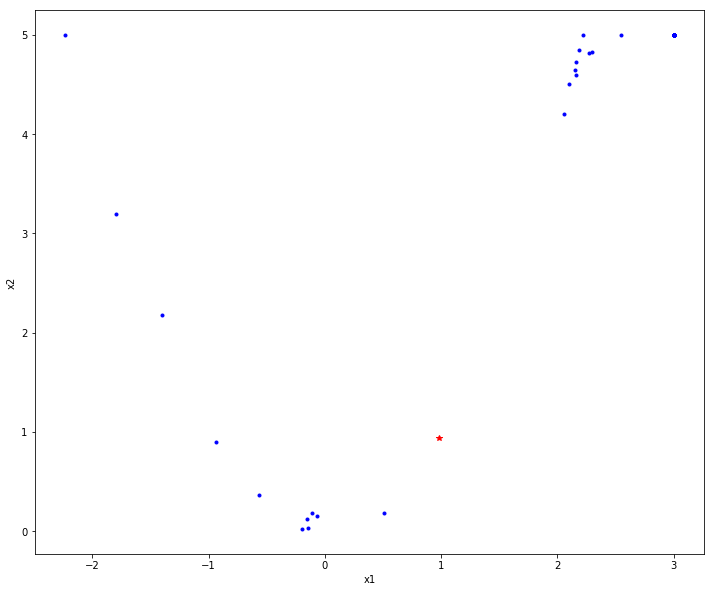

work time :     18.63
[0.97998239 0.94149191] -0.03602188165964447 0
Отклонение от точного решения: 0.03602188165964447


In [7]:
algorithm = DragonflySwarm(150, 2, 70, 0.1, 0.1, 0.7, 1, 1, 0.9, 1, 1, 10, 9, 4, 0.5)
#print('Функция: ', algorithm.function_name)
algorithm.Work()
print(algorithm.best_list[0].x, algorithm.best_list[0].f, algorithm.exact)
print('Отклонение от точного решения:', algorithm.exact - algorithm.best_list[0].f)

In [5]:
algorithm = DragonflySwarm(150, 2, 170, 0.1, 0.1, 0.7, 1, 1, 0.9, 1, 1, 10, 0, 4, 0.5)
#print('Функция: ', algorithm.function_name)
algorithm.Work()
print(algorithm.best_list[0].x, algorithm.best_list[0].f, algorithm.exact)
print('Отклонение от точного решения:', algorithm.exact - algorithm.best_list[0].f)

Функция:  Квадратичная
work time :     42.55
[-0.06998516 -0.03681296] -0.006253116087057308 0
Отклонение от точного решения: 0.006253116087057308


In [19]:
#    algorithm = DragonflySwarm(150, 2, 170, 0.1, 0.1, 0.7, 1, 1, 0.9, 1, 1, 10, 1, 0, 0.5)
# #print('Функция: ', algorithm.function_name)
# algorithm.Work()
# print(algorithm.best_list[0].x, algorithm.best_list[0].f, algorithm.exact)
# print('Отклонение от точного решения:', algorithm.exact - algorithm.best_list[0].f) 

In [8]:
algorithm = DragonflySwarm(250, 2, 170, 0.6, 0.5, 0.7, 1, 1, 0.9, 1, 1, 10, 2, 3, 0.5)
#print('Функция: ', algorithm.function_name)
algorithm.Work()
print(algorithm.best_list[0].x, algorithm.best_list[0].f, algorithm.exact)
print('Отклонение от точного решения:', algorithm.exact - algorithm.best_list[0].f)

Функция:  Мульти
work time :     94.35
[-1.63978494  1.65077816] 4.176484427163521 4.253888
Отклонение от точного решения: 0.07740357283647903


In [23]:
algorithm = DragonflySwarm(150, 2, 170, 0.1, 0.1, 0.7, 1, 1, 0.9, 1, 1, 10, 0, 3, 0.5)
#print('Функция: ', algorithm.function_name)
algorithm.Work()
print(algorithm.best_list[0].x, algorithm.best_list[0].f, algorithm.exact)
print('Отклонение от точного решения:', algorithm.exact - algorithm.best_list[0].f)

Функция:  Квадратичная
work time :     35.94
[0.08688172 0.07130817] -0.01263328948279525 0
Отклонение от точного решения: 0.01263328948279525


Функция:  Мульти


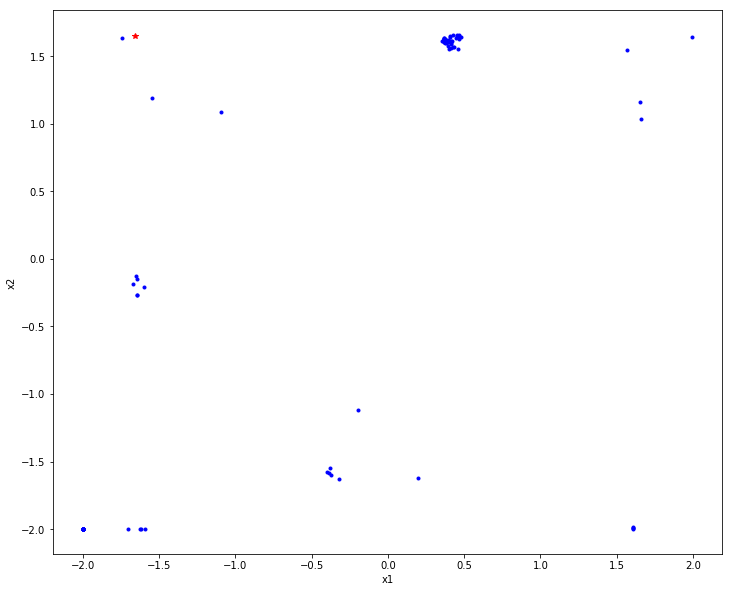

work time :      1.90
[-1.66195323  1.6515317 ] 4.046546796546965 4.253888
Отклонение от точного решения: 0.2073412034530353


In [7]:
algorithm = DragonflySwarm(20, 2, 170, 0.6, 0.5, 0.7, 1, 1, 0.9, 1, 1, 10, 2, 3, 0.5)
#print('Функция: ', algorithm.function_name)
algorithm.Work()
print(algorithm.best_list[0].x, algorithm.best_list[0].f, algorithm.exact)
print('Отклонение от точного решения:', algorithm.exact - algorithm.best_list[0].f)

Функция:  Растригина


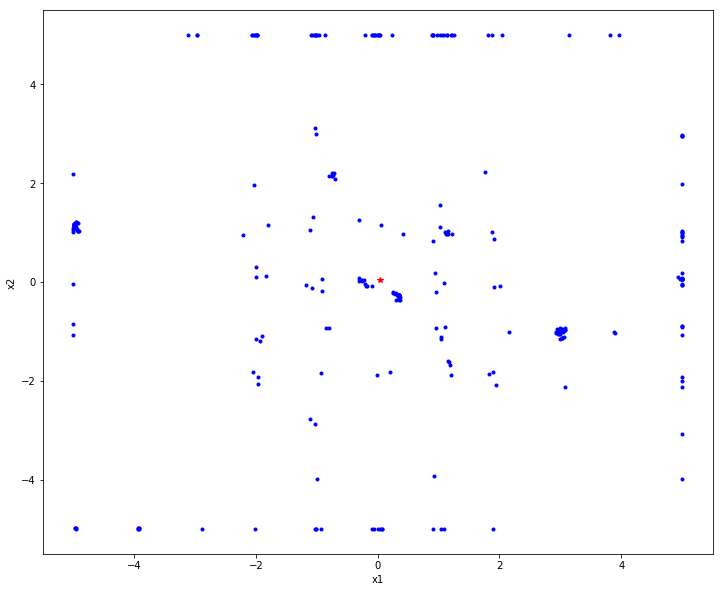

work time :     57.54
[0.04264322 0.04049705] 19.317754946247632 20
Отклонение от точного решения: 0.6822450537523679


In [11]:
algorithm = DragonflySwarm(120, 2, 270, 0.6, 0.5, 0.7, 1, 1, 0.9, 1, 1, 10, 5, 2, 0.5)
#print('Функция: ', algorithm.function_name)
algorithm.Work()
print(algorithm.best_list[0].x, algorithm.best_list[0].f, algorithm.exact)
print('Отклонение от точного решения:', algorithm.exact - algorithm.best_list[0].f)

Функция:  Мульти


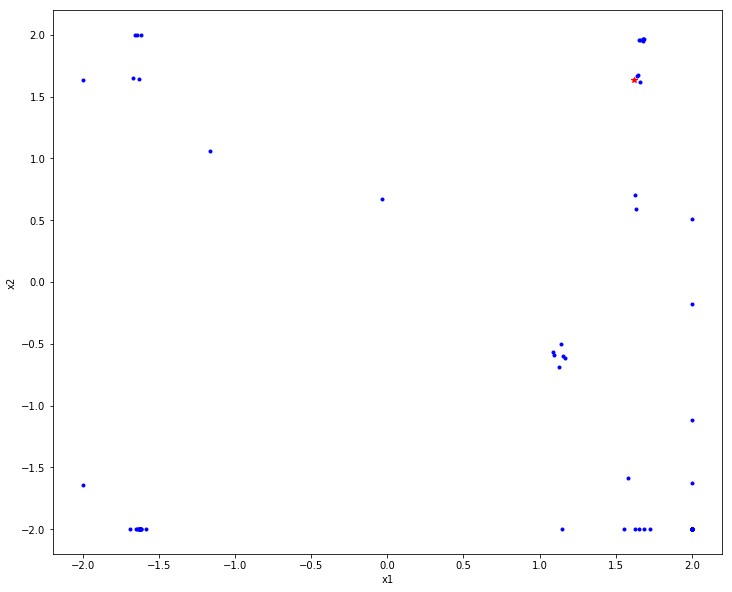

work time :    233.82
[1.62049836 1.6379124 ] 4.234303580904484 4.253888
Отклонение от точного решения: 0.01958441909551567


In [14]:
algorithm = DragonflySwarm(350, 2, 200, 0.6, 0.5, 0.7, 1, 1, 0.9, 1, 1, 10, 2, 3, 0.5)
#print('Функция: ', algorithm.function_name)
algorithm.Work()
print(algorithm.best_list[0].x, algorithm.best_list[0].f, algorithm.exact)
print('Отклонение от точного решения:', algorithm.exact - algorithm.best_list[0].f)

Функция:  Мульти


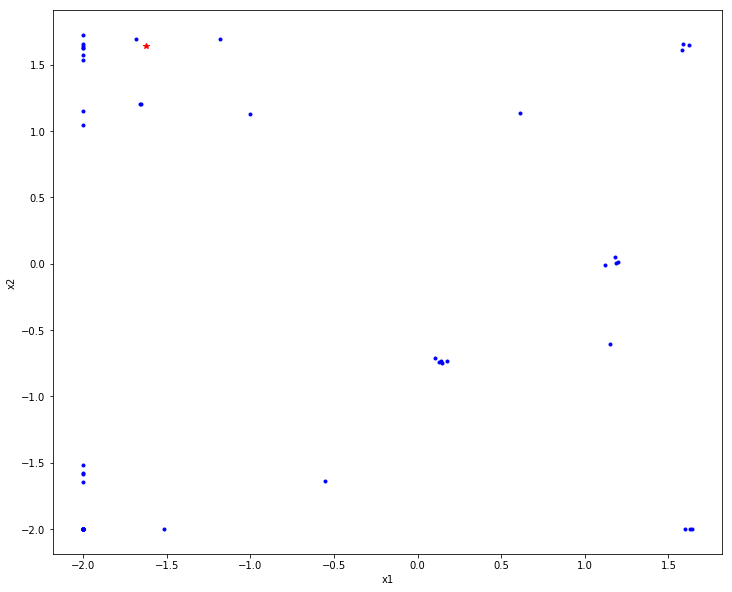

work time :    703.53
[-1.62622212  1.64216868] 4.230127861338703 4.253888
Отклонение от точного решения: 0.023760138661296892


In [11]:
algorithm = DragonflySwarm(550, 2, 200, 0.6, 0.5, 0.7, 1, 1, 0.9, 1, 1, 10, 2, 3, 0.5)
#print('Функция: ', algorithm.function_name)
algorithm.Work()
print(algorithm.best_list[0].x, algorithm.best_list[0].f, algorithm.exact)
print('Отклонение от точного решения:', algorithm.exact - algorithm.best_list[0].f)